# Training Models
This notebook is dedicated to chapter 4 of the book.

Exploring how models can be trained

## Linear Regression Model
### Definition
We can define the linear model as follows:
$$
\hat{y}=\theta_{0} + \theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n}
$$
Where:
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_{i}$ is the $x^{ith}$ feature value (i.e., the instance attribute values)
* $\theta_{j}$ is the $j^{th}$ model parameter including the bias term $\theta_0$ and the feature weights $\theta_1,\theta_2,\dots,\theta_n$

And in vectorized form:
$$
\hat{y}=h_{\theta}(X)=\theta^T \cdot X
$$
Where:
* $\hat{y}$ is again the predicted value
* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$, and the feature weights $\theta_1$ to $\theta_n$
* $\theta^T$ is the transpose of $\theta$, a row vector instead of a column vector.
* $X$ is the instance's *feature vector*, containing $x_0$ to $x_n$ **with $x_0$ always equal to $1$.**
* $\theta^TX$ is the dot product of $\theta^T$ and $X$
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$

### Metrics
A linear model consists on fitting the equation of a line (the model) on a series of data points that resembles a line. We are going to play with the model parameters, i.e., $\theta_{n}$ till we find a line that best fits the data. For doing this, we need a measure that tell us this. In this case, we can think of this measurement as the distance between each data point and the line we are fitting, the less the difference the better. This metric is called *Mean Squared Error* or *MSE*:

$$
MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)})^2
$$

This is basically, adding all the differences between the point in the line (predicted value) and the actual value then square it (to deal with negative values) and finaly averaging it depending on the number of samples.

This is then a Minimization problem as we want to find the values for $\theta_{n}$ such that minimizes the value of $MSE(\theta)$

### The normal equation
So the definition of this problem as a formula would be:
$$
\hat{\theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

### Visualization

In [20]:
import numpy as np

np.random.seed(12345)
# Generate 100 points, rand receives the dimensions of the returning vector,
# in this case, 100 rows and 1 column
X = 2 * np.random.rand(100, 1)
# This is basically applying the model 'y = 3x + 4' however, we are adding noise with a random normal distribution to simulate some dispersion in the data points
y = 4 + 3 * X + np.random.randn(100, 1)

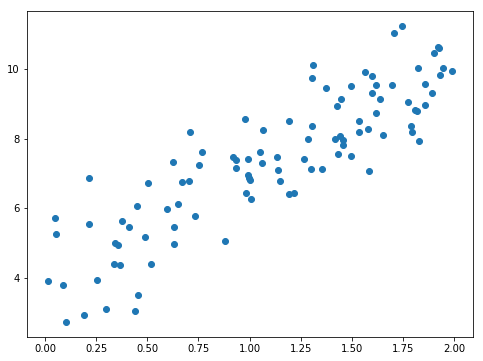

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.show()

Now, let's compute $\hat{\theta}$ using the normal function and with help of numpy's linear algebra packages to calculate the inverse of a matrix (-1 exponent) and the dot product.

In [27]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[3.9801249 ],
       [3.05940348]])

Notice the actual values of the function we used to generate the data (+ Gaussian Noise) and look at what we obtained here, they resemble pretty well the original values, considering the noise off course.

Now, let's make predictions using these thetas as model parameters and plot the line and appreciate it graphically

In [28]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9801249 ],
       [10.09893186]])

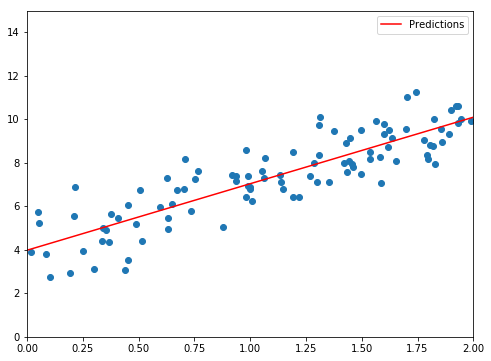

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15]) # X axis from 0 to 2, Y axis from 0 to 15
plt.legend(["Predictions"])
plt.show()

Equivalent code using scikit learn

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9801249]), array([[3.05940348]]))